# Chain Graph Convergence Time

## Motivation
When studying the behaviour of the Hegselmann Krause model with a social graph, we discovered that there is a considerable increase in convergence time when the aforementioned graph is a chain. We would like to discover why this happens.

## Experiment Design
When the confidence interval is relatively small, we expect to see the quick formation of many disconnected clusters across the chain and as a result rather small convergence times. On the other hand, when the confidence interval becomes so large that the whole chain can converge to a single cluster, we predict a considerable rise in the time it takes for the model to converge, due to the huge amount of information that needs to be conveyed from one part of the chain to the other.

### Experiment 1
In the first experiment, we give an opinion of 0.0 to the first N/2 nodes of the chain and an opinion of 1.0 to the other N/2. Setting the confidence interval to 1.0, we ensure the connectivity of the nodes. The result reveals that there is an exponential growth of the convergence time as the number of nodes increases.

### Experiment 2
In the second experiment we alternate the opinions of the nodes, giving an opinion of 0.0 to even nodes and an opinion of 1.0 to odd ones. The confidence interval is again set at 1.0. The line graph of the convergence times proves a bit more complex in this case, oscillating at first and then stabilizing at about 1200 rounds.

In [43]:
%matplotlib inline
from __future__ import division, print_function

import numpy as np
from numpy import diag
import numpy.random as rand
from numpy.linalg import norm, inv, eigvals

import sys
from IPython import display
from tqdm import tqdm
from ipyparallel import Client

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain, repeat
import pandas as pd

import models
from util import *
from viz import *
import networkx as nx

sns.set_context('paper', font_scale=1.5)

In [18]:
v, dv = parallel_init('/home/user/opinions-research/', profile='default')

[*] 8 parallel engines available
[*] Finished setting working directories


In [29]:
def create_chain(N):
    A = np.zeros((N, N))
    for i in xrange(N):
        if i - 1 >= 0:
            A[i, i-1] = 1
        A[i, i] = 1
        if i + 1 < N:
            A[i, i+1] = 1
    return A

def run_model(args):
    import models
    A, s = args
    t, z = models.hk_local_nomem(A, s, 1.0, 30e3)
    return t

# Special Case 1
def create_oposite_values(N):
    s1 = np.repeat(1.0, N//2)
    s2 = np.repeat(0.0, (N+1)//2)
    s = np.concatenate((s1, s2))
    A = create_chain(N)
    return (A, s)

# Special Case 2
def create_alternating_values(N):
    s = np.array([1.0 if i % 2 == 0 else 0.0 for i in xrange(N)])
    A = create_chain(N)
    return (A, s)

# Special Case 3
def create_sorted_values(N):
    s = np.arange(0.0, N, 1.0)
    A = create_chain(N)
    return (A, s)

# Experiment 1

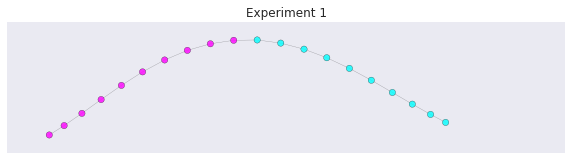

In [4]:
N = 20
A1, s1 = create_oposite_values(N)
A2, s2 = create_alternating_values(N)
A3, s3 = create_sorted_values(N)

plt.subplot(3, 1, 1)
plot_network(A1, s1)
plt.title('Experiment 1')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [5]:
N_list = np.arange(3, 120, 2)
arg_list1 = [create_oposite_values(N) for N in N_list]

In [11]:
result1 = np.array(parallel_map(v, run_model, arg_list1))
np.savetxt('chain1.txt', result1)

[*] Running simulation. Do not interrupt this process!


[*] Done!


In [3]:
result1 = np.loadtxt('chain1.txt')

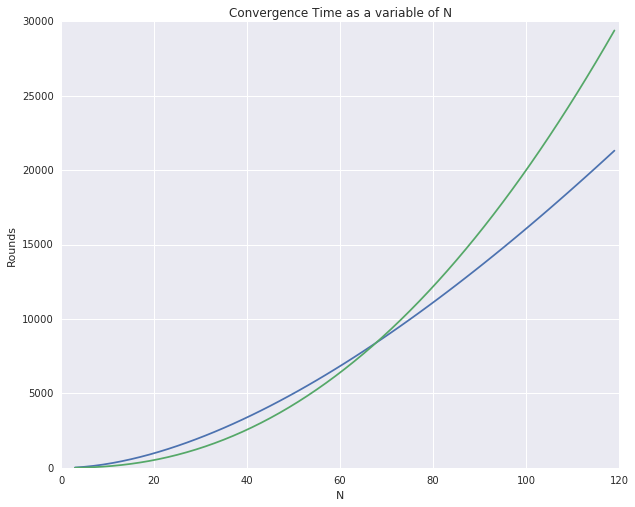

In [13]:
n3 = np.power(N_list,2)*np.log10(N_list)
plt.plot(N_list, result1)
#plt.plot(N_list, n3)
plt.title('Convergence Time as a variable of N')
plt.xlabel('N')
plt.ylabel('Rounds')
plt.show()

# Experiment 2

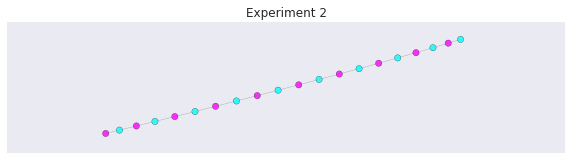

In [20]:
plt.subplot(3, 1, 1)
plot_network(A2, s2)
plt.title('Experiment 2')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [21]:
N_list = np.arange(4, 200, 1)
arg_list2 = [create_alternating_values(N) for N in N_list]
result2 = parallel_map(v, run_model, arg_list2)

[*] Running simulation. Do not interrupt this process!


[*] Done!


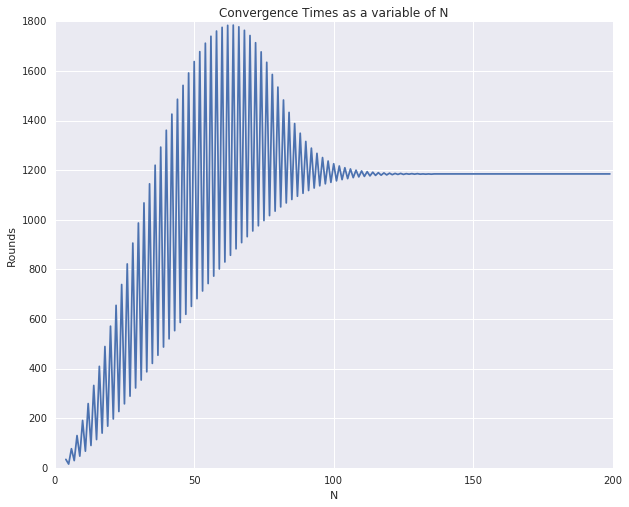

In [22]:
#argmax = np.argmax(result2)
#print('Maximum Convergence Time at: {0}'.format(N_list[argmax]))
plt.plot(N_list, result2, label='Special Case 2')

plt.title('Convergence Times as a variable of N')
plt.xlabel('N')
plt.ylabel('Rounds')
plt.show()

## N = 2K

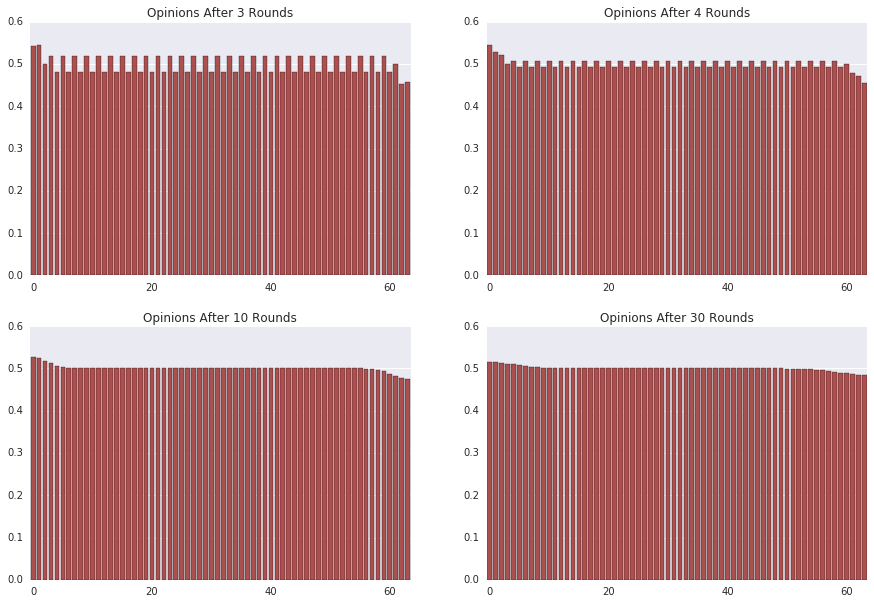

In [143]:
N = 64
max_rounds = 100
A, s = create_alternating_values(N)
op = models.hk_local(A, s, 1.0, max_rounds)

for i, t in enumerate([3, 4, 10, 30]):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=range(N), y=op[t, :], color=sns.xkcd_rgb['dull red'])
    plt.xticks(range(0, N, 20), range(0, N, 20))
    plt.title('Opinions After {0} Rounds'.format(t))

plt.show()

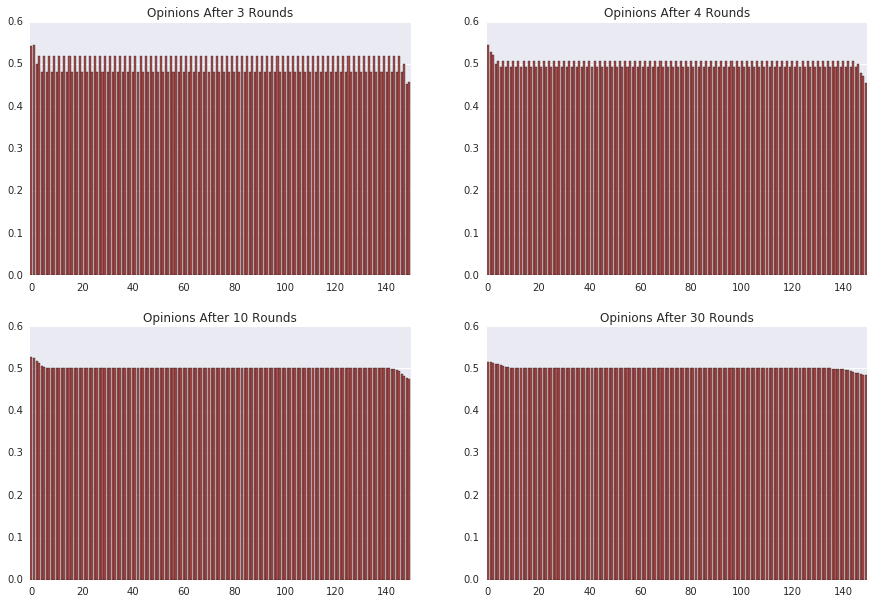

In [3]:
N = 150
max_rounds = 100
A, s = create_alternating_values(N)
op = models.hk_local(A, s, 1.0, max_rounds)

for i, t in enumerate([3, 4, 10, 30]):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=range(N), y=op[t, :], color=sns.xkcd_rgb['dull red'])
    plt.xticks(range(0, N, 20), range(0, N, 20))
    plt.title('Opinions After {0} Rounds'.format(t))

plt.show()

## N = 2K + 1

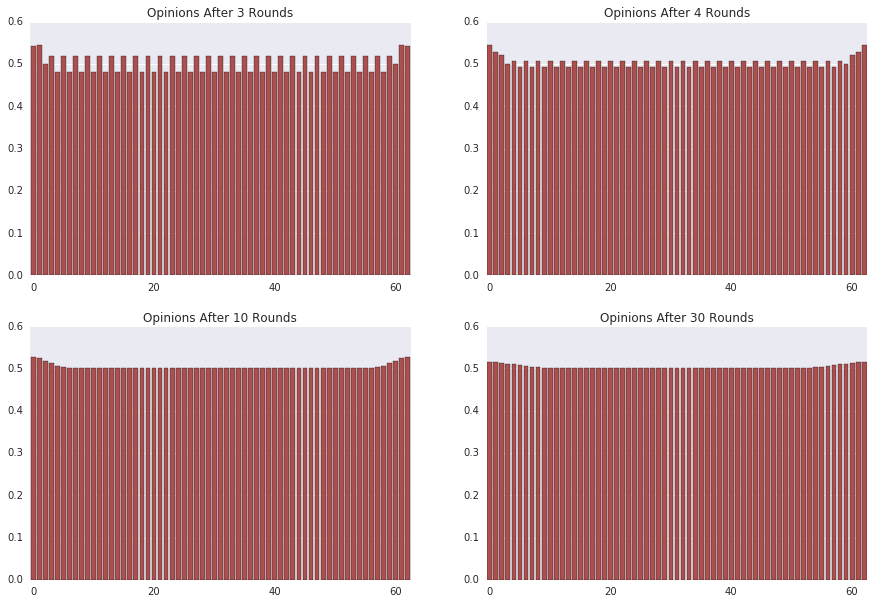

In [9]:
N = 63
max_rounds = 100
A, s = create_alternating_values(N)
op = models.hk_local(A, s, 1.0, max_rounds)

for i, t in enumerate([3, 4, 10, 30]):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=range(N), y=op[t, :], color=sns.xkcd_rgb['dull red'])
    plt.xticks(range(0, N, 20), range(0, N, 20))
    plt.title('Opinions After {0} Rounds'.format(t))

plt.show()

# Why does the difference between odd and even N disappear after ~100?

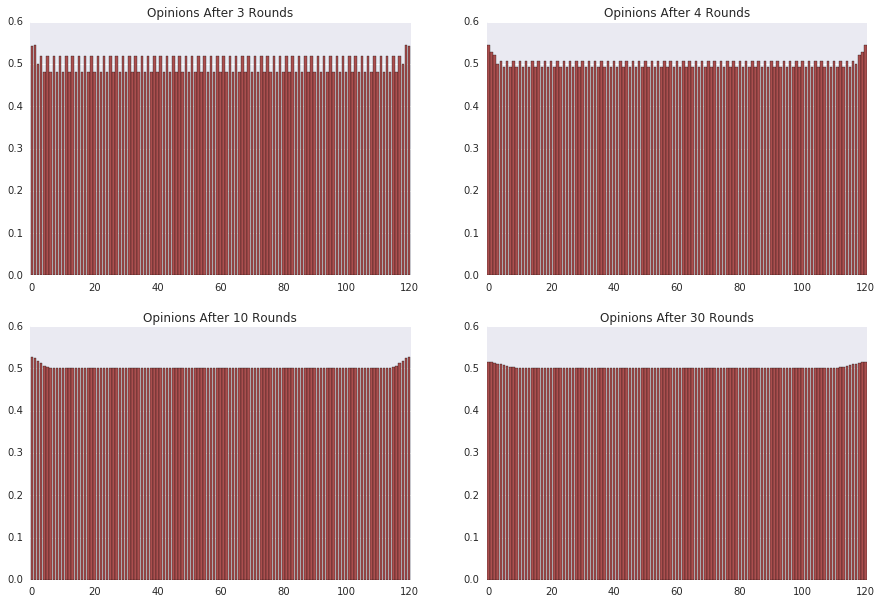

In [13]:
N = 121
max_rounds = 100
A, s = create_alternating_values(N)
op = models.hk_local(A, s, 1.0, max_rounds)

for i, t in enumerate([3, 4, 10, 30]):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=range(N), y=op[t, :], color=sns.xkcd_rgb['dull red'])
    plt.xticks(range(0, N, 20), range(0, N, 20))
    plt.title('Opinions After {0} Rounds'.format(t))

plt.show()

## The same graphs for Experiment 1

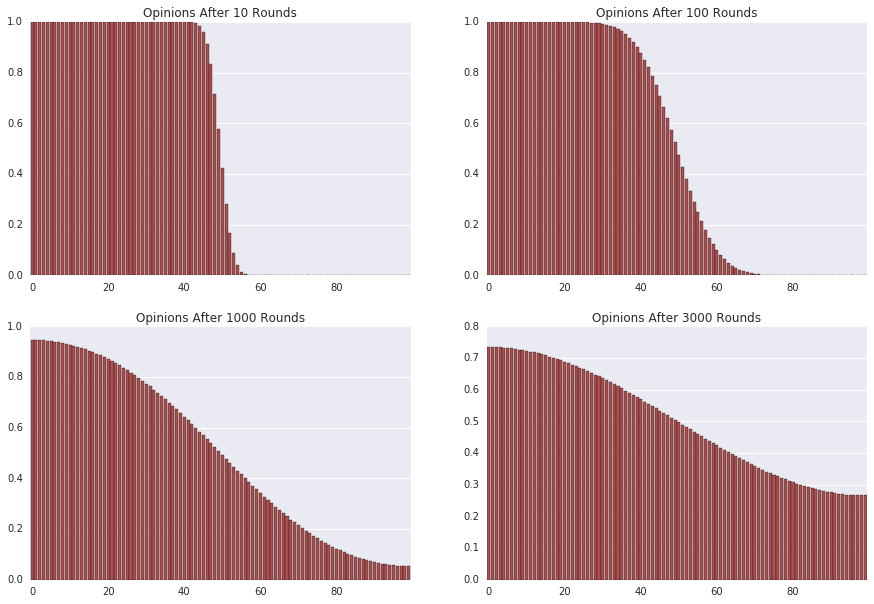

In [144]:
N = 100
max_rounds = 5e3
A, s = create_oposite_values(N)
op = models.hk_local(A, s, 1.0, max_rounds)

for i, t in enumerate([10, 100, 1000, 3000]):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=range(N), y=op[t, :], color=sns.xkcd_rgb['dull red'])
    plt.xticks(range(0, N, 20), range(0, N, 20))
    plt.title('Opinions After {0} Rounds'.format(t))

plt.show()